# ENTRENAMIENTO  Y PREDICCION
![mediapipe](https://1.bp.blogspot.com/-RjVvJBpOqZM/X9FyAXxqOJI/AAAAAAAAG4c/RyeG52IfWt8Nho4XD5cY5gN9lzThsqq1QCLcBGAsYHQ/s960/image3.gif)

In [3]:
# LIBRERIAS IMPORTADAS
import os
import cv2
import pandas as pd
import pickle 
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
import seaborn as sns
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [4]:
mp_drawing = mp.solutions.drawing_utils     # utilidades de dibujo
mp_holistic = mp.solutions.holistic         # mapa holistico

# MACHINE LEARNING

# Entrenamiento

In [5]:
df = pd.read_csv('data6complet.csv')

In [11]:
df

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
0,Abajo,0.440598,0.783921,-2.366612e-07,0.456324,0.744731,-0.019115,0.488569,0.721949,-0.028583,...,-0.076862,0.278362,0.462741,-0.162137,0.791987,0.570950,-0.406257,0.230211,0.762704,-0.394085
1,Abajo,0.438445,0.783089,-2.491245e-07,0.456896,0.744480,-0.016129,0.490010,0.721718,-0.023793,...,-0.011478,0.278908,0.463437,-0.152372,0.791986,0.570950,-0.292670,0.230245,0.762779,-0.377853
2,Abajo,0.443570,0.780087,-1.923205e-07,0.462270,0.742764,-0.015684,0.493633,0.721211,-0.023362,...,0.079940,0.279700,0.464741,-0.169411,0.788502,0.558375,-0.187706,0.230808,0.763529,-0.428225
3,Abajo,0.448515,0.780262,-2.180878e-07,0.463991,0.741014,-0.016938,0.495846,0.720119,-0.025368,...,0.115322,0.279688,0.467163,-0.177098,0.784908,0.549394,-0.169941,0.231852,0.764947,-0.451566
4,Abajo,0.446438,0.780774,-2.177188e-07,0.463033,0.740608,-0.016879,0.496571,0.719811,-0.024843,...,0.124477,0.279688,0.468285,-0.182670,0.782062,0.545701,-0.154944,0.232256,0.766068,-0.462583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167822,Sentir,0.480988,0.498306,8.850981e-08,0.492217,0.525324,-0.006937,0.514244,0.551460,-0.012449,...,-0.287496,0.384857,0.472747,0.124890,0.765231,0.713053,-0.486247,0.211414,0.557262,-0.198898
167823,Sentir,0.485302,0.497981,9.188329e-08,0.494239,0.525964,-0.008215,0.515622,0.553339,-0.013998,...,-0.288823,0.384940,0.472833,0.141059,0.765137,0.711631,-0.496637,0.214348,0.557628,-0.202024
167824,Sentir,0.487513,0.511341,1.046459e-07,0.496922,0.537452,-0.007108,0.520481,0.561847,-0.011736,...,-0.284764,0.388381,0.472953,0.166371,0.765048,0.710605,-0.514640,0.219207,0.557752,-0.196317
167825,Sentir,0.490010,0.511641,8.533668e-08,0.498679,0.538518,-0.007571,0.519595,0.565015,-0.013794,...,-0.252590,0.390278,0.473201,0.229377,0.764639,0.708330,-0.500495,0.223445,0.557906,-0.119077


In [12]:
df.tail()

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
167822,Sentir,0.480988,0.498306,8.850981e-08,0.492217,0.525324,-0.006937,0.514244,0.551460,-0.012449,...,-0.287496,0.384857,0.472747,0.124890,0.765231,0.713053,-0.486247,0.211414,0.557262,-0.198898
167823,Sentir,0.485302,0.497981,9.188329e-08,0.494239,0.525964,-0.008215,0.515622,0.553339,-0.013998,...,-0.288823,0.384940,0.472833,0.141059,0.765137,0.711631,-0.496637,0.214348,0.557628,-0.202024
167824,Sentir,0.487513,0.511341,1.046459e-07,0.496922,0.537452,-0.007108,0.520481,0.561847,-0.011736,...,-0.284764,0.388381,0.472953,0.166371,0.765048,0.710605,-0.514640,0.219207,0.557752,-0.196317
167825,Sentir,0.490010,0.511641,8.533668e-08,0.498679,0.538518,-0.007571,0.519595,0.565015,-0.013794,...,-0.252590,0.390278,0.473201,0.229377,0.764639,0.708330,-0.500495,0.223445,0.557906,-0.119077
167826,Sentir,0.494779,0.518503,7.813231e-08,0.502876,0.546529,-0.007597,0.522929,0.574004,-0.013233,...,-0.248198,0.392094,0.472884,0.236195,0.764571,0.705250,-0.497000,0.223138,0.557971,-0.116440


<AxesSubplot:>

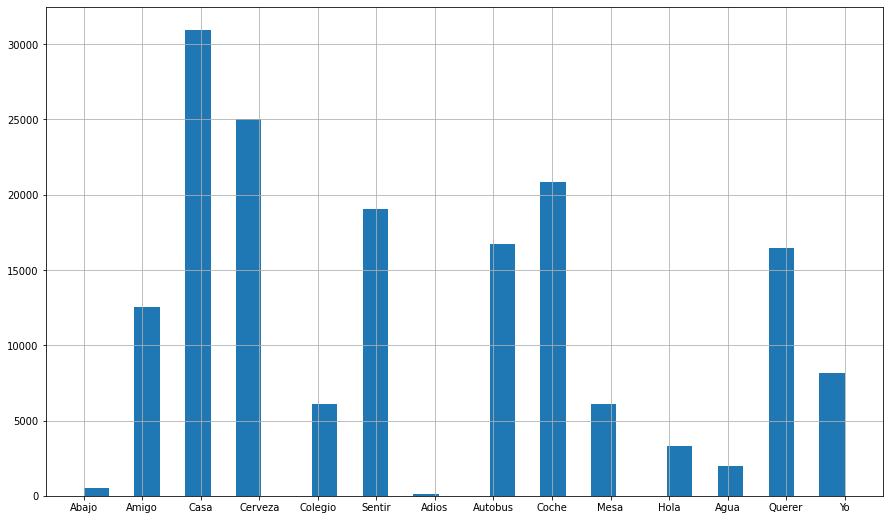

In [13]:
plt.figure(figsize=(15,9))
df['Word'].hist(bins=30)

In [14]:
df['Word'].unique()

array(['Abajo', 'Amigo', 'Casa', 'Cerveza', 'Colegio', 'Sentir', 'Adios',
       'Autobus', 'Coche', 'Mesa', 'Hola', 'Agua', 'Querer', 'Yo'],
      dtype=object)

In [15]:
df.isnull().sum()

Word                             0
RHandLandmark.WRIST_0_x          0
RHandLandmark.WRIST_0_y          0
RHandLandmark.WRIST_0_z          0
RHandLandmark.THUMB_CMC_1_x      0
                                ..
PoseLandmark.LEFT_ELBOW_13_y     0
PoseLandmark.LEFT_ELBOW_13_z     0
PoseLandmark.RIGHT_ELBOW_14_x    0
PoseLandmark.RIGHT_ELBOW_14_y    0
PoseLandmark.RIGHT_ELBOW_14_z    0
Length: 172, dtype: int64

SEPARACION DE DATOS

In [4]:
X = df.drop('Word', axis=1) 
y = df['Word'] 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [39]:
y_test

56439     Cerveza
100561      Coche
68979      Sentir
149448     Querer
114968       Hola
           ...   
84127     Autobus
161742     Sentir
101968      Coche
51768     Cerveza
87666     Autobus
Name: Word, Length: 50349, dtype: object

### ELECCION DE MODELOS A UTILIZAR

In [6]:
pipelines = {
    'lr':make_pipeline(MinMaxScaler(), LogisticRegression()),
    'rc':make_pipeline(MinMaxScaler(), RidgeClassifier()),
    'rf':make_pipeline(MinMaxScaler(), RandomForestClassifier()),
     'sv':make_pipeline(MinMaxScaler(),SVC(probability=True))
}

In [7]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model
    


C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
fit_models

{'lr': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'sv': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc', SVC(probability=True))])}

### DETERMINAR EXACTITUD DE MODELOS

In [8]:
names=['Log.Regress','Ridge Class','Rand.Forest', 'SVC']
scores=[]
for algo, model in fit_models.items():
    y_pred= model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(algo, accuracy_score(y_test, y_pred))

tr_split=pd.DataFrame({'Name':names,'Score':scores})
    

lr 0.8878031341238157
rc 0.9329678841685038
rf 0.9986494269995432
sv 0.9985699815289281


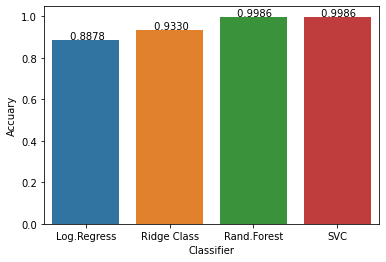

In [9]:
axis = sns.barplot (x = 'Name', y = 'Score', data = tr_split) 
axis.set (xlabel = 'Classifier', ylabel = 'Accuary')

for p in axis.patches: 
    height = p.get_height () 
    axis.text (p.get_x () + p.get_width () / 2, height + 0.005, '{: 1.4f}'. format
                 (height), ha = "center") 

### HACER PREDICCION

In [10]:
fit_models['sv'].predict(X_test)

array(['Cerveza', 'Coche', 'Sentir', ..., 'Coche', 'Cerveza', 'Autobus'],
      dtype=object)

### CREAR MATRIZ DE CONFUSION

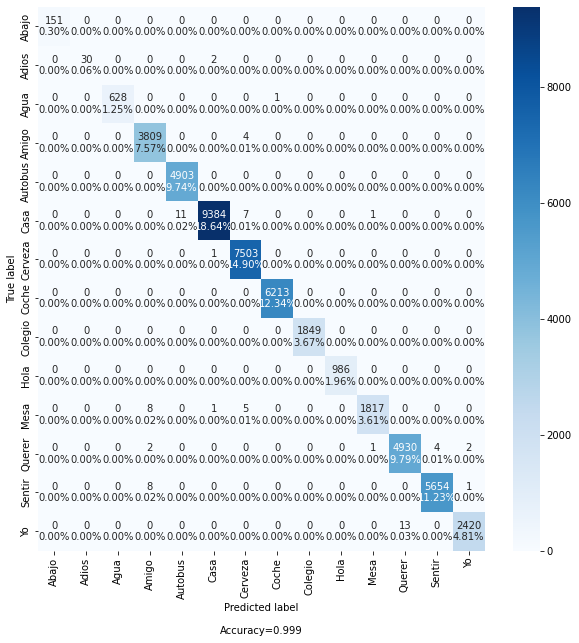

In [13]:

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and  len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in 
                                cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in 
                   zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))

        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1,Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
# Mostrar Confusion Matrix con métricas adicionales

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Abajo', 'Adios','Agua','Amigo','Autobus','Casa','Cerveza','Coche','Colegio','Hola','Mesa','Querer','Sentir','Yo']
cf_matrix = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories,figsize=(10,10))
                        



### GRABAR MODELO

In [29]:
#GRABAR MODELO
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['sv'], f)

## EJECUTAR PREDICCION CON MODELO

In [3]:
# CARGAR MODELO
with open('./body_language6sv.pkl', 'rb') as f:
    model = pickle.load(f)

C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Jose Anton

In [5]:
#COMPROBAR QUE EL MODELO SE HA CARGADO CORRECTAMENTE
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(probability=True))])

### EJECUTAR PREDICCION CON MODELO CARGADO

In [ ]:
sentence=[]

#Marcar puerto camara a utilizar
cap = cv2.VideoCapture(0)

# INIZIALIZAR MODELO HOLISTICO
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  
    while cap.isOpened():
       
        # Leer sequencia
        ret, frame = cap.read()
        if ret == True:
                    
            # Cambiar color  BGR a RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame.flags.writeable = False
            # DETECCION PUNTOS DE REFERENCIA
            results = holistic.process(frame)

            # Escribir palabras detectadas abajo en pantalla
            milista = list(dict.fromkeys(sentence))
            lista=(' '.join(milista))
            if len(milista)==6:
                sentence=sentence=[]
            cv2.putText(frame,lista
                            , (30,470), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)
            cv2.rectangle(frame, (0,440), (640, 480), (245, 117, 16),2)                
            
            # Dibujar puntos y lineas mano izquierda (rojo)
            mp_drawing.draw_landmarks(
                frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2))

           # Dibujar puntos y lineas mano derecha (verde)
            mp_drawing.draw_landmarks(
                frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(57, 143, 0), thickness=2))

           # Dibujar puntos y lineas cuerpo (azul)
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(128, 0, 255), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))
            
            try:
                
                # Añadir coordenadas a la lista
                row = []
                # Los coordenadas de las palabras son añadidos a la lista
              
                ## Detectar puntos mano derecha (rhand)
                
                for landmark in results.right_hand_landmarks.landmark:
                    row.append(landmark.x)
                    row.append(landmark.y)
                    row.append(landmark.z)
                
                
                ## Detectar puntos mano izquierda (lhand).
                
                for landmark in results.left_hand_landmarks.landmark:
                    row.append(landmark.x)
                    row.append(landmark.y)
                    row.append(landmark.z)
                
                ## Detectar puntos cuerpo
                                
                count = 0
                for landmark in results.pose_landmarks.landmark:
                    row.append(landmark.x)
                    row.append(landmark.y)
                    row.append(landmark.z)
                    count += 1
                    if count == 15:
                       break
                                   
            except:
                pass
                        
           
            if len(row)==171:
                       
                X = pd.DataFrame([row])
            
                body_language_class = model.predict(X)[0] # palabra del modelo
                body_language_prob = model.predict_proba(X)[0]  # probabilidad del modelo
                #print(body_language_class)

                #COGER PUNTO DE REFERENCIA ( referencia oreja izquierda)
                     
                coords = tuple(np.multiply(
                                np.array(
                                    (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                     results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                            , [640,480]).astype(int))
                
                # Hacer rectangulo utilizando punto de referencia anterior
                cv2.rectangle(frame, 
                              (coords[0]+10, coords[1]+5), 
                              (coords[0]+len(body_language_class)*25, coords[1]-30), 
                              (0, 255, 0), -1)
            
                # Hacer texto cogiendo punto de referencia anterior
                cv2.putText(frame, body_language_class, (coords[0]+15, coords[1]+1),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
                # TEXTO ABAJO PANTALLA CON NOMBRES DETECTADOS
                for i in body_language_prob:
                    if (i)>9.50e-01:
                        sentence.append(body_language_class)
            
                # RECTANGULO SUPERIOR IZQUIERDA
                cv2.rectangle(frame, (0,0), (250, 60), (245, 117, 16),2)
            
                # Ver nombre palabra en el rectangulo
                cv2.putText(frame, 'CLASS'  # texto enunciado
                            , (110,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(frame, body_language_class.split(' ')[0]   #texto valor class
                            , (110,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            
                # Ver probabilidad en el rectangulo
                cv2.putText(frame, 'PROB'
                            , (15,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)# texto enunciado
                cv2.putText(frame, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                            , (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) #texto probabilidad 
                         
                     
            
            frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
            cv2.imshow("Imagen a detectar", frame)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        else:
            break

        
cap.release()
cv2.destroyAllWindows()

C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Jose Antonio Amador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-